<a href="https://colab.research.google.com/github/ebaad4000/DSA-PROJECT/blob/main/20_18sw137_DiabetesDetection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Preprocessing

In [ ]:
df = pd.DataFrame(pd.read_csv("/diabetes.csv"))

In [ ]:
#displaying the head of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.

* mean tells us the mean value of that feature.

* std tells us the Standard Deviation Value of that feature.

* min tells us the minimum value of that feature.

* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile

* information helps us to detect Outliers.

* max tells us the maximum value of that feature.

In [ ]:
#description of dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#768 rows and 9 columns
df.shape

(768, 9)

In [ ]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
#It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
df_new = df.copy(deep = True)
df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_new.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
#Listing of 10 largest values for that field
df.nlargest(10,['BloodPressure'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,0.207,27,0
691,13,158,114,0,0,42.3,0.257,44,1
43,9,171,110,24,240,45.4,0.721,54,1
177,0,129,110,46,130,67.1,0.319,26,1
549,4,189,110,31,0,28.5,0.680,37,0
84,5,137,108,0,0,48.8,0.227,37,1
362,5,103,108,37,0,39.2,0.305,65,0
658,11,127,106,0,0,39.0,0.190,51,0
662,8,167,106,46,231,37.6,0.165,43,1
672,10,68,106,23,49,35.5,0.285,47,0


In [ ]:
#Standardize the variable
df_new = df.std()

In [ ]:
df_new

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [ ]:
df_new.mean()

22.92743279787284

In [ ]:
df_new.std()

36.07925076113047

In [ ]:
df_new.isnull().any()

False

In [ ]:
df_new.isnull().all()

False

# Exploratory Data Analysis


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


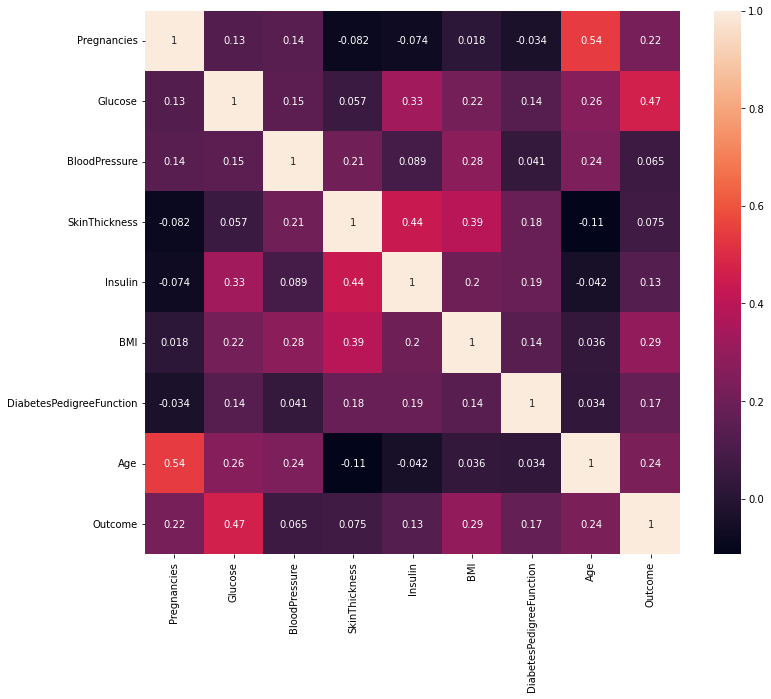

In [ ]:
#A **heat map** is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.
#correlation
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True)

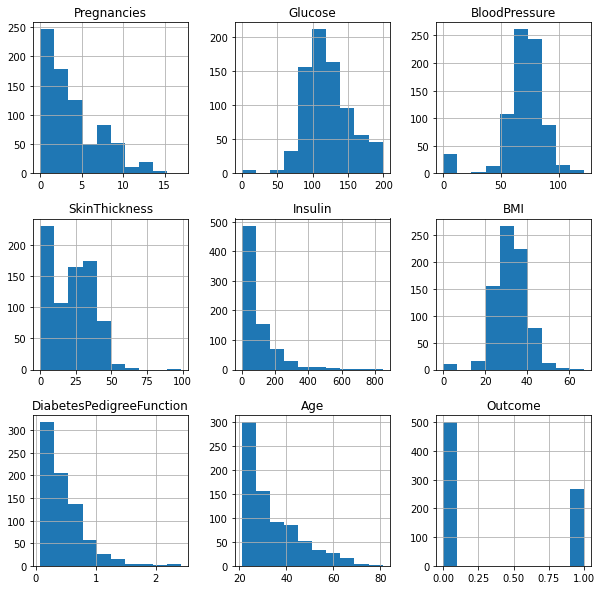

In [ ]:
#Histogram
df.hist(figsize = (10,10))
plt.show()

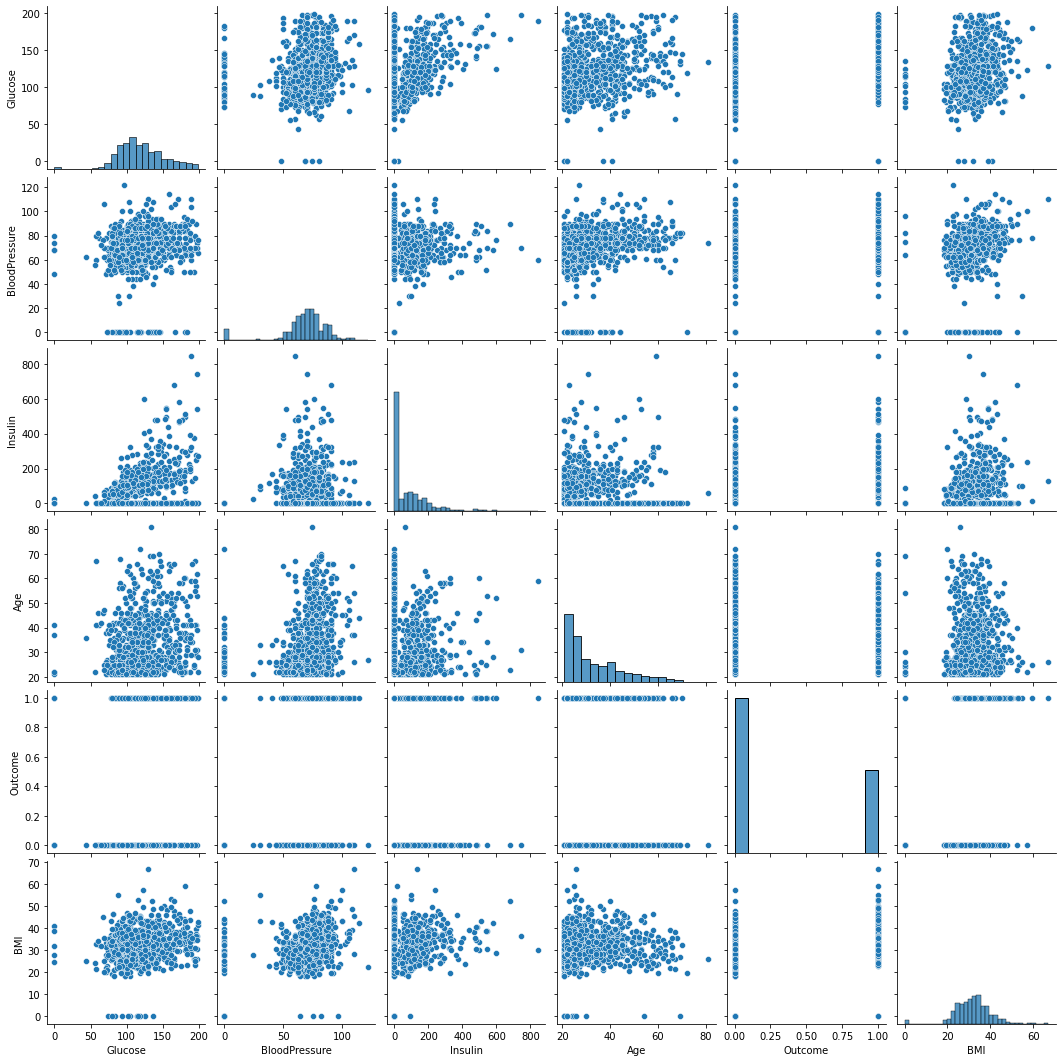

In [ ]:
#pairplot
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']
sns.pairplot(df[mean_col],palette = 'Accent')

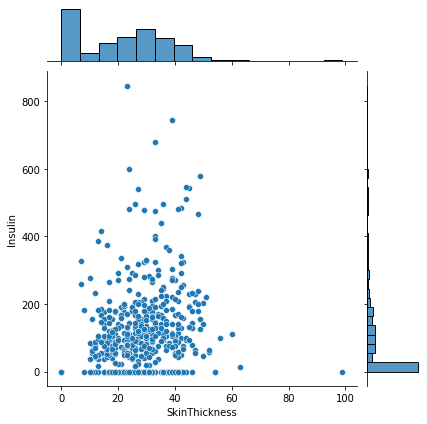

In [ ]:
#scatterplot
sns.jointplot(x='SkinThickness', y='Insulin', data=df)

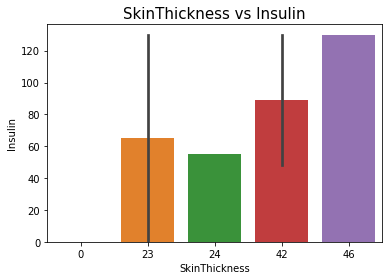

In [ ]:
#barplot
sns.barplot(x='SkinThickness', y='Insulin', data=df[170:180])
plt.title("SkinThickness vs Insulin", fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

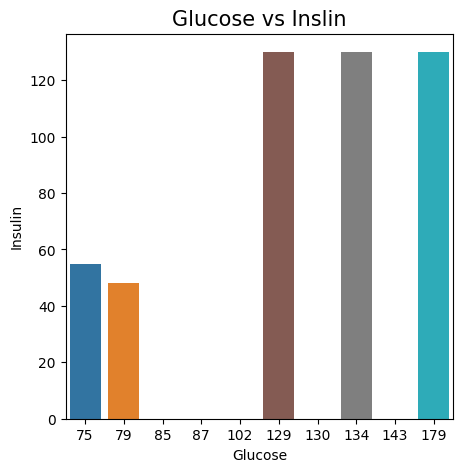

In [ ]:
#barplot
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x='Glucose', y='Insulin', data=df[170:180])
plt.title("Glucose vs Inslin", fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

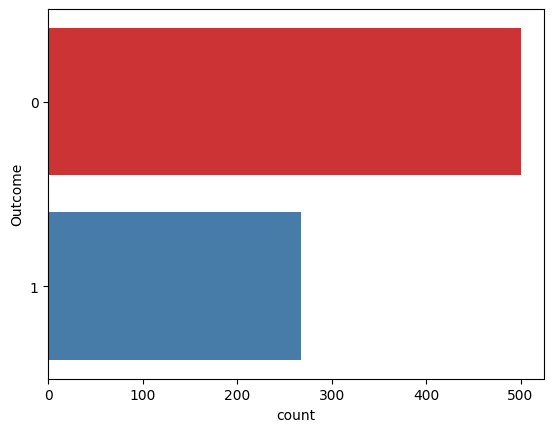

In [ ]:
# Lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

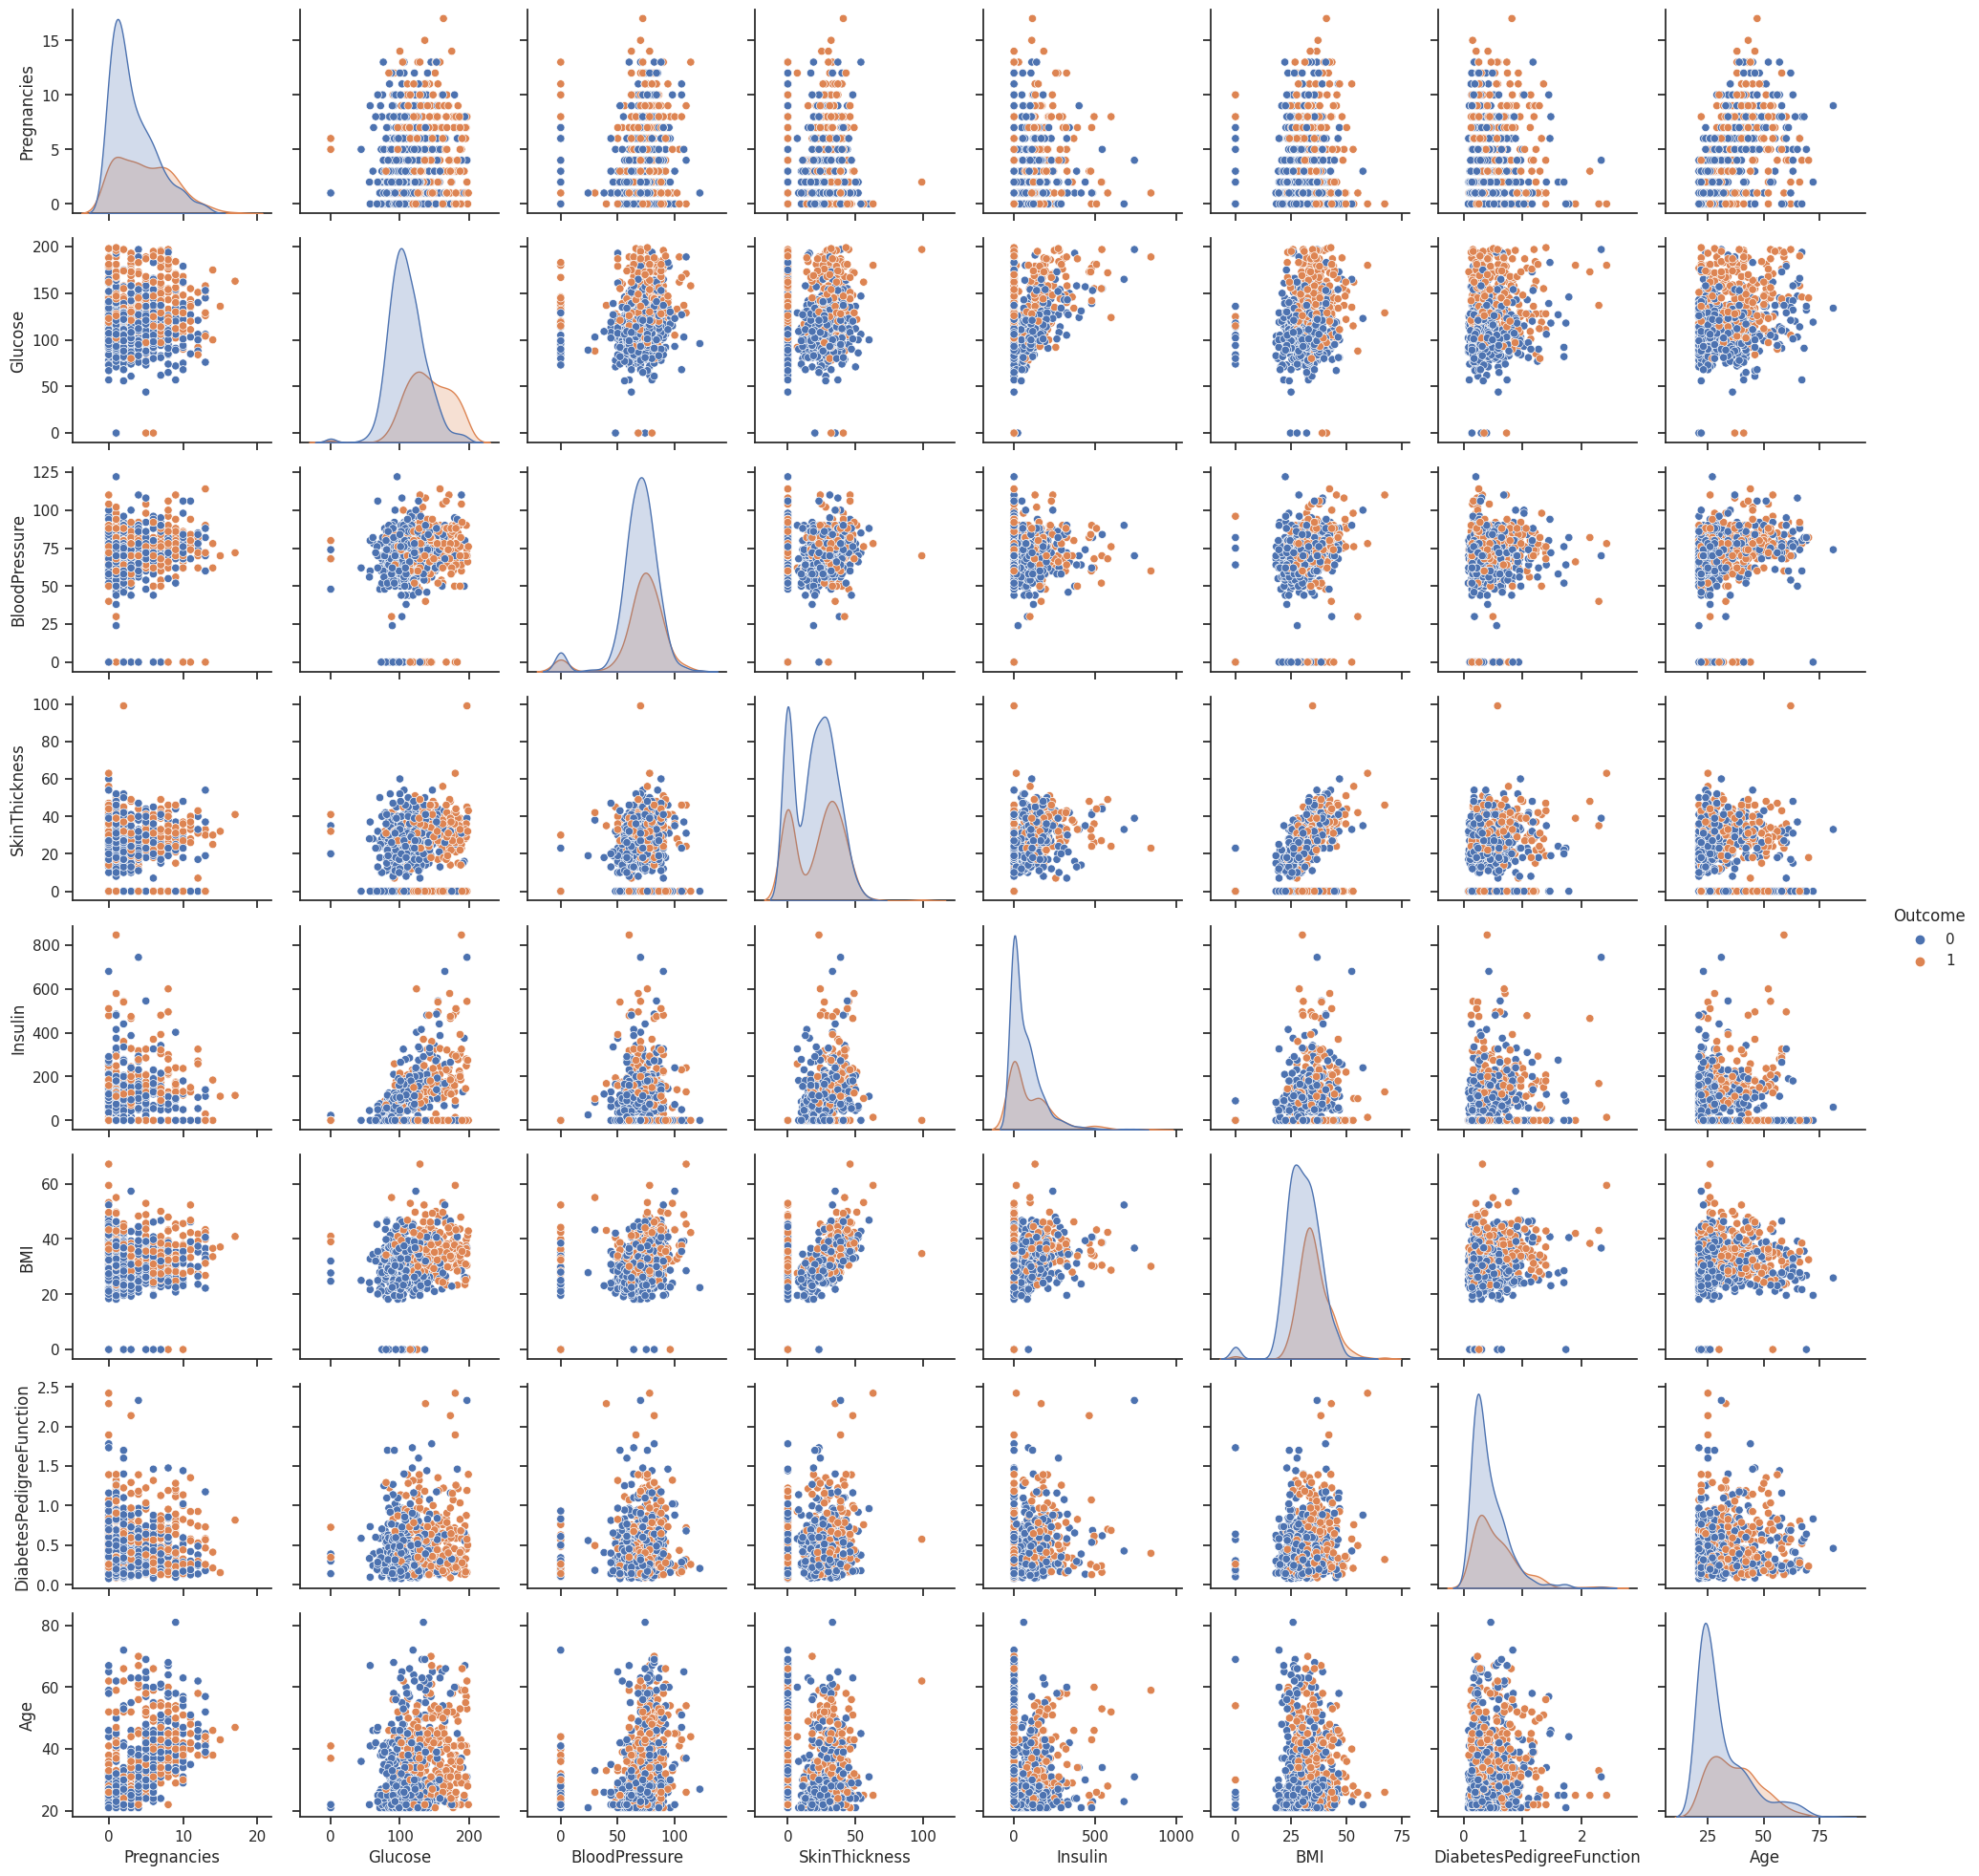

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

Text(0, 0.5, 'Count of Patients')

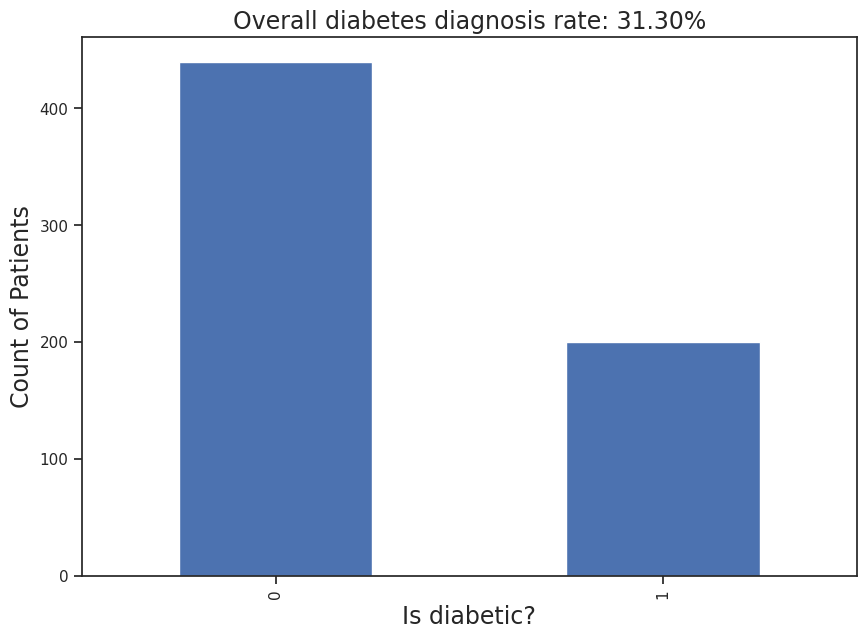

In [ ]:
# visualizing distribution of Y feature (predictive variable)
plt.figure(figsize=(10,7))
df_out.Outcome.value_counts().sort_index().plot.bar()
diabetic_rate = df_out.Outcome.mean()
plt.title(f"Overall diabetes diagnosis rate: {diabetic_rate:.2%}", size=17)
plt.xlabel('Is diabetic?', size=17)
plt.ylabel('Count of Patients', size=17)

# Data Modeling

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [ ]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((511, 8), (128, 8), (511,), (128,))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_test, y_pred): return confusion_matrix(y_test, y_train)[0, 0]
def fp(y_test, y_pred): return confusion_matrix(y_test, y_pred)[0, 1]
def fn(y_test, y_pred): return confusion_matrix(y_test, y_pred)[1, 0]
def tp(y_test, y_pred): return confusion_matrix(y_test, y_pred)[1, 1]

In [ ]:
#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [ ]:
#Perform 2 sample z-test
from statsmodels.stats.weightstats import ztest as ztest
ztest(X_train['BMI'],X_train['Age'],value=0)

(-1.19907975419344, 0.23049693560747075)